In [1]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
results_dir = "imdb_trainsize_experiment"
dv_logreg_result_fn = "imdb_trainsize_results.json"
roberta_result_fn = "imdb_trainsize_roberta_results.json"

In [3]:
with open(os.path.join(results_dir, dv_logreg_result_fn)) as f:
    dv_logreg_result = pd.DataFrame(json.load(f))

with open(os.path.join(results_dir, roberta_result_fn)) as f:
    roberta_result = pd.DataFrame(json.load(f))

In [4]:
dv_df = dv_logreg_result.iloc[dv_logreg_result.groupby(["id", "model"])["dev_acc"].idxmax().values]
roberta_result["model"] = "RoBERTa"
df_result = pd.concat([dv_df, roberta_result])
df_result.rename(columns={
    "train_size": "Training Size",
    "test_acc": "Test Accuracy"
}, inplace=True)
df_result.model.replace({
    "DV(.*)": r"DV-ngrams-cosine\1"
    }, inplace=True, regex=True)
df_result["Test Accuracy"] *= 100

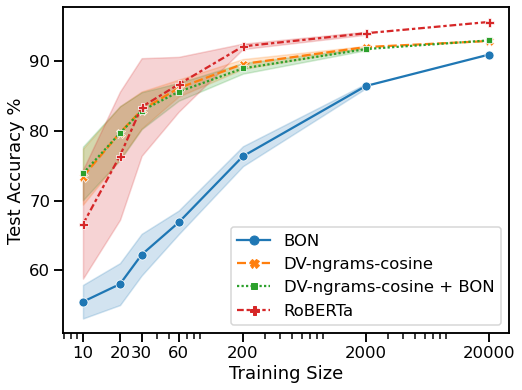

In [5]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(8, 6))
g = sns.lineplot(data=df_result, x="Training Size", y="Test Accuracy", hue="model", style="model", markers=True, ci="sd")
g.set(xscale="log")
xticks = sorted(df_result["Training Size"].unique())
g.set(xticks=xticks)
g.set(xticklabels=xticks)
g.axes.set_ylabel("Test Accuracy %")
g.legend(loc=4)
fig.savefig("figures/train_size.jpg")
